In [3]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns

In [4]:
import plotly.graph_objects as go
import plotly.express as px

In [5]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [6]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [7]:
dataset = (r'/Users/chiaraciscato/Desktop/geomar/data_transfer/Cropped/CO2flux_Baseline_2.6_cropped.nc')
data_baseline = xr.open_dataset(dataset)

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning:

pyproj unable to set database path.



In [8]:
dataset_oae = (r'/Users/chiaraciscato/Desktop/geomar/data_transfer/Cropped/CO2flux_OAE_2.6_cropped.nc')
data_oae = xr.open_dataset(dataset_oae)

### EU Seasonal Average of CO2 Flux

In [9]:
data_baseline = data_baseline.where(data_baseline)
data_oae = data_oae.where(data_oae)

In [10]:
sliced_frame_baseline = data_baseline.sel(time_counter=slice('2090', '2100'))

In [11]:
sliced_frame_oae = data_oae.sel(time_counter=slice('2090', '2100'))

In [12]:
data_baseline_plot = data_baseline.co2flux_cpl.mean(dim=('y', 'x'))
data_oae_plot = data_oae.co2flux_cpl.mean(dim=('y', 'x'))

In [13]:
data_baseline_plot = data_baseline_plot.to_dataset()
data_oae_plot = data_oae_plot.to_dataset()

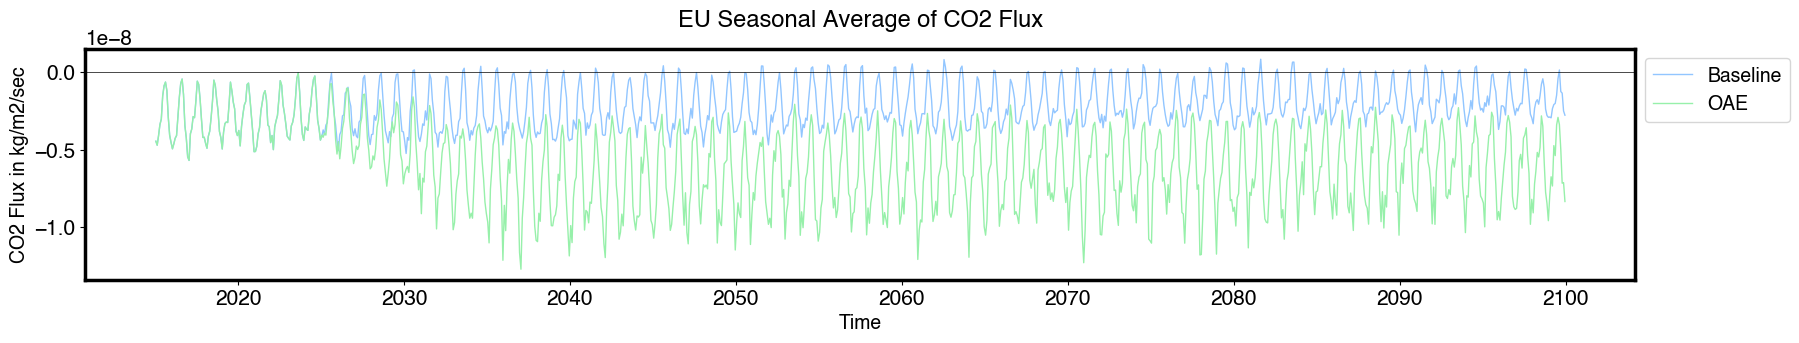

In [12]:
plt.figure(figsize=(20, 3))
plt.plot(data_baseline_plot.time_counter, data_baseline_plot.co2flux_cpl, linewidth=1, label = 'Baseline')
plt.plot(data_oae_plot.time_counter, data_oae_plot.co2flux_cpl, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 Flux in kg/m2/sec", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of CO2 Flux', fontname="Helvetica", fontsize=17, y=1.06)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

In [13]:
sliced_frame_baseline_plot = sliced_frame_baseline.co2flux_cpl.mean(dim=('y', 'x'))
sliced_frame_oae_plot = sliced_frame_oae.co2flux_cpl.mean(dim=('y', 'x'))

In [14]:
sliced_frame_baseline_plot = sliced_frame_baseline_plot.to_dataset()
sliced_frame_oae_plot = sliced_frame_oae_plot.to_dataset()

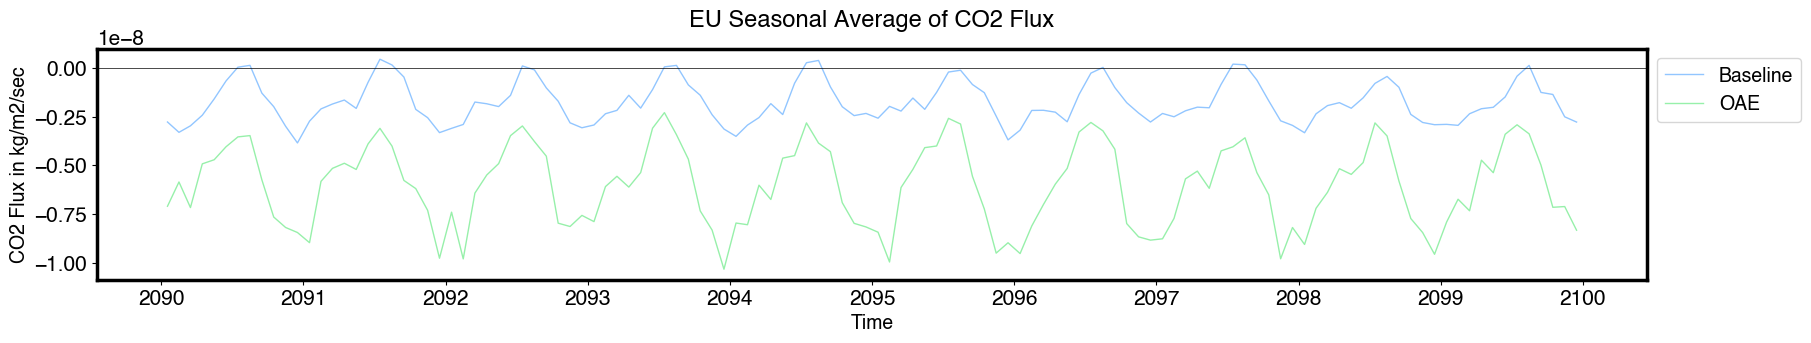

In [15]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.co2flux_cpl, linewidth=1, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.co2flux_cpl, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 Flux in kg/m2/sec", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of CO2 Flux', fontsize=17, y=1.06)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

### Unweighted EU Seasonal Average of CO2 Flux

In [16]:
start_date = "2090-01-01"
end_date = "2100-01-01"

co2flux_cpl_baseline = data_baseline["co2flux_cpl"].sel(time_counter=slice(start_date, end_date))

In [17]:
co2flux_season_summary_baseline = co2flux_cpl_baseline.groupby('time_counter.season').mean('time_counter', skipna=True)
co2flux_season_mean_all_years_baseline = co2flux_cpl_baseline.resample(time_counter='QS-DEC').mean(keep_attrs=True)
co2flux_seasonal_mean_baseline = co2flux_season_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

In [18]:
start_date = "2090-01-01"
end_date = "2100-01-01"

co2flux_cpl_oae = data_oae["co2flux_cpl"].sel(time_counter=slice(start_date, end_date))

In [19]:
co2flux_season_summary_oae = co2flux_cpl_oae.groupby('time_counter.season').mean('time_counter', skipna=True)
co2flux_season_mean_all_years_oae = co2flux_cpl_oae.resample(time_counter='QS-DEC').mean(keep_attrs=True)
co2flux_seasonal_mean_oae = co2flux_season_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

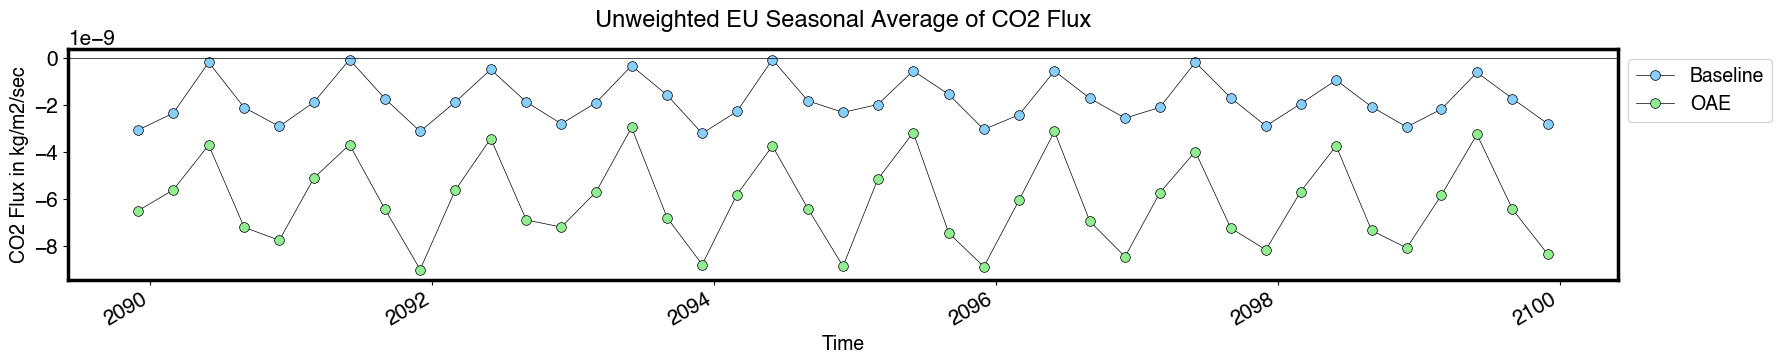

In [20]:
f, ax = plt.subplots(figsize=(20, 3))

co2flux_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

co2flux_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Seasonal Average of CO2 Flux", fontsize= 17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 Flux in kg/m2/sec", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

### Weighted EU Seasonal Average of CO2 Flux

In [21]:
month_length_baseline = co2flux_cpl_baseline.time_counter.dt.days_in_month
co2flux_weighted_mean_baseline = ((co2flux_cpl_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
co2flux_weighted_mean_baseline = co2flux_weighted_mean_baseline.where(co2flux_weighted_mean_baseline)
co2flux_weighted_season_baseline = co2flux_weighted_mean_baseline.groupby('time_counter').mean(["y", "x"])

In [22]:
month_length_oae = co2flux_cpl_oae.time_counter.dt.days_in_month
co2flux_weighted_mean_oae = ((co2flux_cpl_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
co2flux_weighted_mean_oae = co2flux_weighted_mean_oae.where(co2flux_weighted_mean_oae)
co2flux_weighted_season_oae = co2flux_weighted_mean_oae.groupby('time_counter').mean(["y", "x"])

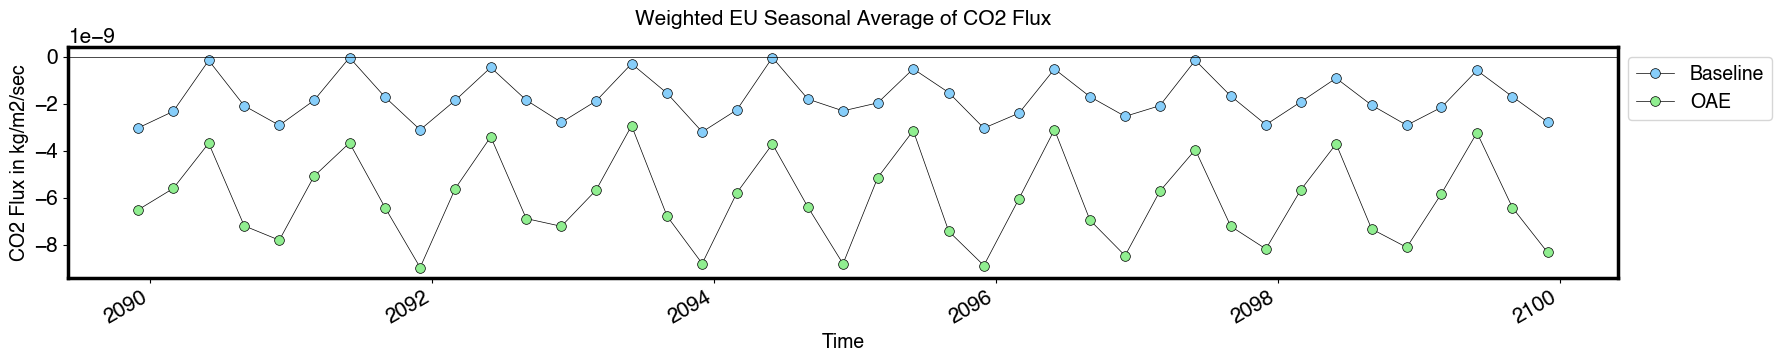

In [23]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, ax = plt.subplots(figsize=(20, 3))
co2flux_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

co2flux_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted EU Seasonal Average of CO2 Flux", fontsize=15, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 Flux in kg/m2/sec", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

### Weighted EU Seasonal Average of CO2 Flux (seasons displayed)

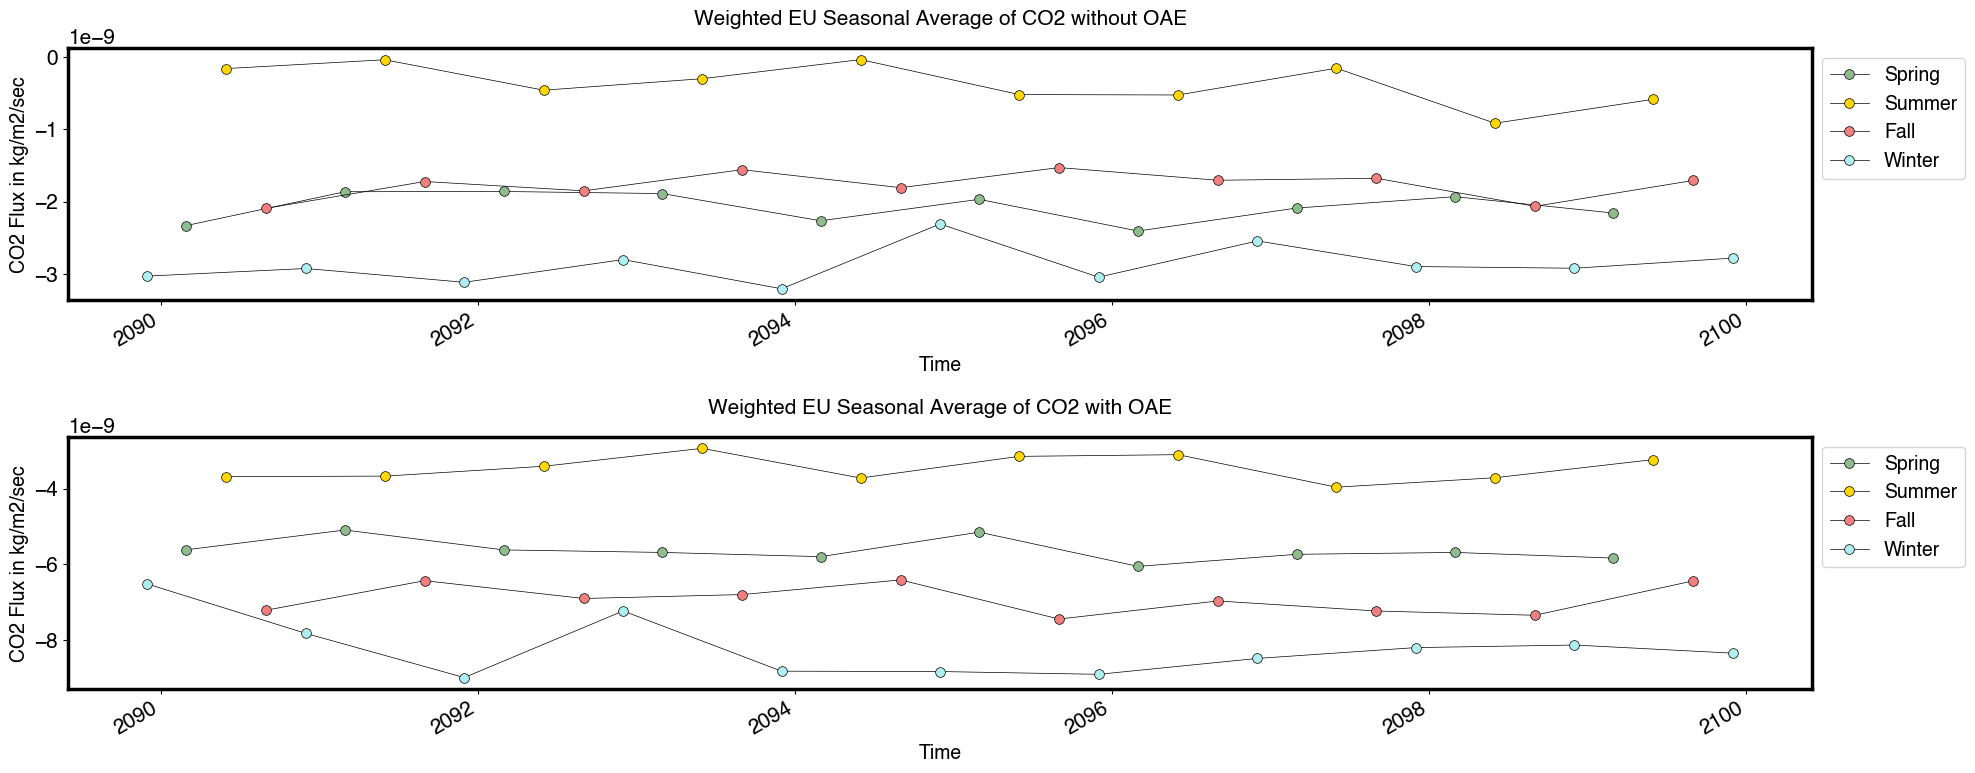

In [24]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in co2flux_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5, 
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted EU Seasonal Average of CO2 without OAE", fontsize=15, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14)

for month, arr in co2flux_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5, 
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted EU Seasonal Average of CO2 with OAE", fontsize=15, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14)
f.tight_layout()
plt.show()

### Weighted EU Seasonal Average of CO2 Flux without OAE (seasons displayed)

In [25]:
co2flux_weighted_baseline = co2flux_weighted_season_baseline.to_dataframe('co2flux_cpl')
co2flux_weighted_baseline['Month'] = pd.DatetimeIndex(co2flux_weighted_baseline.index).month

In [26]:
conditions = [
    (co2flux_weighted_baseline['Month'] == 3),
    (co2flux_weighted_baseline['Month'] == 6),
    (co2flux_weighted_baseline['Month'] == 9),
    (co2flux_weighted_baseline['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

co2flux_weighted_baseline['Month'] = np.select(conditions, values)

In [27]:
colors = dict(zip(co2flux_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

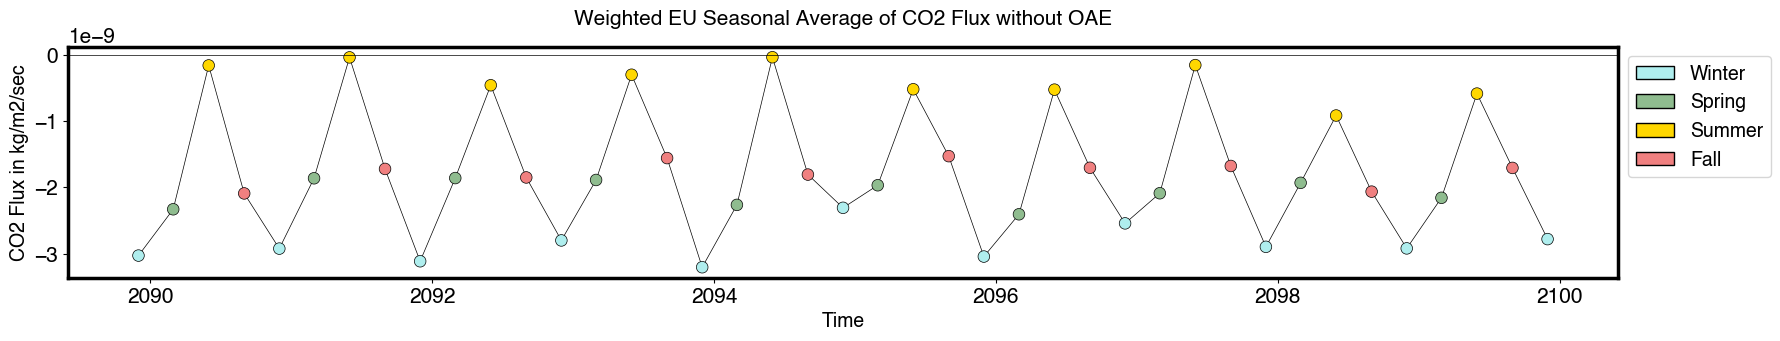

In [28]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(co2flux_weighted_baseline.index, co2flux_weighted_baseline.co2flux_cpl, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(co2flux_weighted_baseline.index, co2flux_weighted_baseline.co2flux_cpl, color=co2flux_weighted_baseline.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of CO2 Flux without OAE", fontsize=15, y=1.06)
ax.axhline(0, color='black', linewidth=0.5)

pass

### Weighted EU Seasonal Average of CO2 Flux with OAE (seasons displayed)

In [29]:
co2flux_weighted_oae = co2flux_weighted_season_oae.to_dataframe('co2flux_cpl')
co2flux_weighted_oae['Month'] = pd.DatetimeIndex(co2flux_weighted_oae.index).month

In [30]:
conditions = [
    (co2flux_weighted_oae['Month'] == 3),
    (co2flux_weighted_oae['Month'] == 6),
    (co2flux_weighted_oae['Month'] == 9),
    (co2flux_weighted_oae['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

co2flux_weighted_oae['Month'] = np.select(conditions, values)

In [31]:
colors = dict(zip(co2flux_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

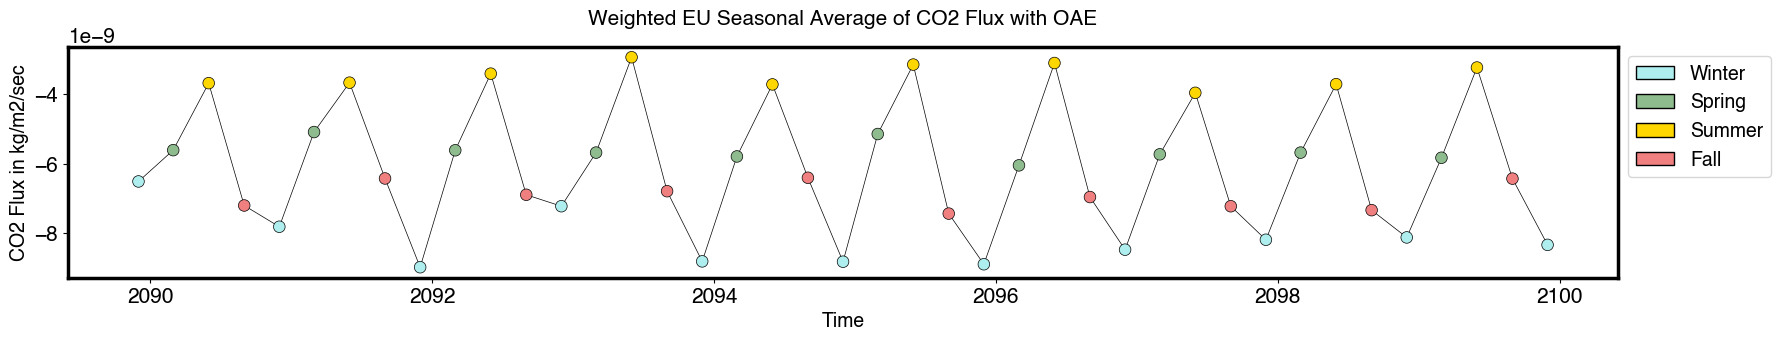

In [32]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(co2flux_weighted_oae.index, co2flux_weighted_oae.co2flux_cpl, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(co2flux_weighted_oae.index, co2flux_weighted_oae.co2flux_cpl, color=co2flux_weighted_oae.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of CO2 Flux with OAE", fontsize=15, y=1.06)

pass

### Weighted EU Seasonal Average of CO2 Flux (seasons displayed)

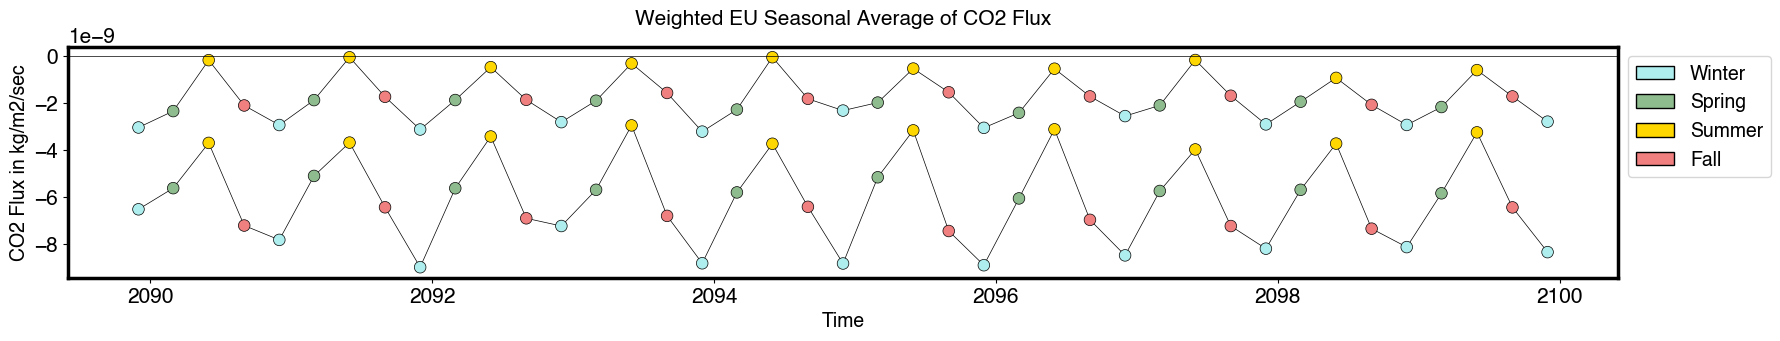

In [33]:
colors = dict(zip(co2flux_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(co2flux_weighted_baseline.index, co2flux_weighted_baseline.co2flux_cpl, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(co2flux_weighted_baseline.index, co2flux_weighted_baseline.co2flux_cpl, color=co2flux_weighted_baseline.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

ax.plot_date(co2flux_weighted_oae.index, co2flux_weighted_oae.co2flux_cpl, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(co2flux_weighted_oae.index, co2flux_weighted_oae.co2flux_cpl, color=co2flux_weighted_oae.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of CO2 Flux", fontsize=15, y=1.06)
ax.axhline(0, color='black', linewidth=0.5)

plt.savefig('co2flux_seasonal_mean.png')

pass

### EU Monthly Averaged CO2 Flux for the last 10 years

In [34]:
mean_baseline = (sliced_frame_baseline.co2flux_cpl.mean(dim=('y', 'x'))).to_dataframe()
mean_baseline = mean_baseline.groupby(mean_baseline.index.month).co2flux_cpl.mean()
mean_baseline = mean_baseline.reset_index()
mean_baseline['time_counter'] = mean_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_baseline = mean_baseline.set_index('time_counter')

In [35]:
mean_oae = (sliced_frame_oae.co2flux_cpl.mean(dim=('y', 'x'))).to_dataframe()
mean_oae = mean_oae.groupby(mean_oae.index.month).co2flux_cpl.mean()
mean_oae = mean_oae.reset_index()
mean_oae['time_counter']= mean_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_oae = mean_oae.set_index('time_counter')

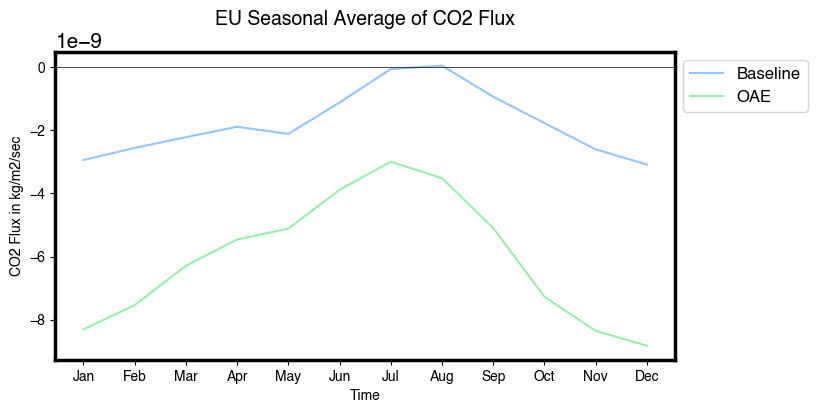

In [36]:
plt.figure(figsize=(8,4))
plt.plot(mean_baseline.co2flux_cpl, label='Baseline')
plt.plot(mean_oae.co2flux_cpl, label='OAE')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.xlabel("Time", fontsize=10)
plt.ylabel("CO2 Flux in kg/m2/sec", fontsize=10)
plt.xticks(fontsize=10, fontname="Helvetica")
plt.yticks(fontsize=10, fontname="Helvetica")
plt.title('EU Seasonal Average of CO2 Flux', fontname="Helvetica", fontsize=14, y=1.06)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

### Map of EU Seasonal Average of CO2 Flux without OAE

In [37]:
month_length_baseline = sliced_frame_baseline.time_counter.dt.days_in_month 
weights_baseline = (month_length_baseline.groupby("time_counter.season") / month_length_baseline.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights_baseline.groupby('time_counter.season').sum().values, np.ones(4))

In [38]:
weights_baseline = weights_baseline.to_dataset()

In [39]:
ds_weighted_baseline = (sliced_frame_baseline.co2flux_cpl * weights_baseline.days_in_month).groupby("time_counter.season").sum(dim="time_counter")
ds_weighted_baseline = ds_weighted_baseline.to_dataset(name='co2flux_cpl')
ds_unweighted_baseline = sliced_frame_baseline.groupby("time_counter.season").mean(dim="time_counter")
ds_diff_baseline = ds_weighted_baseline - ds_unweighted_baseline

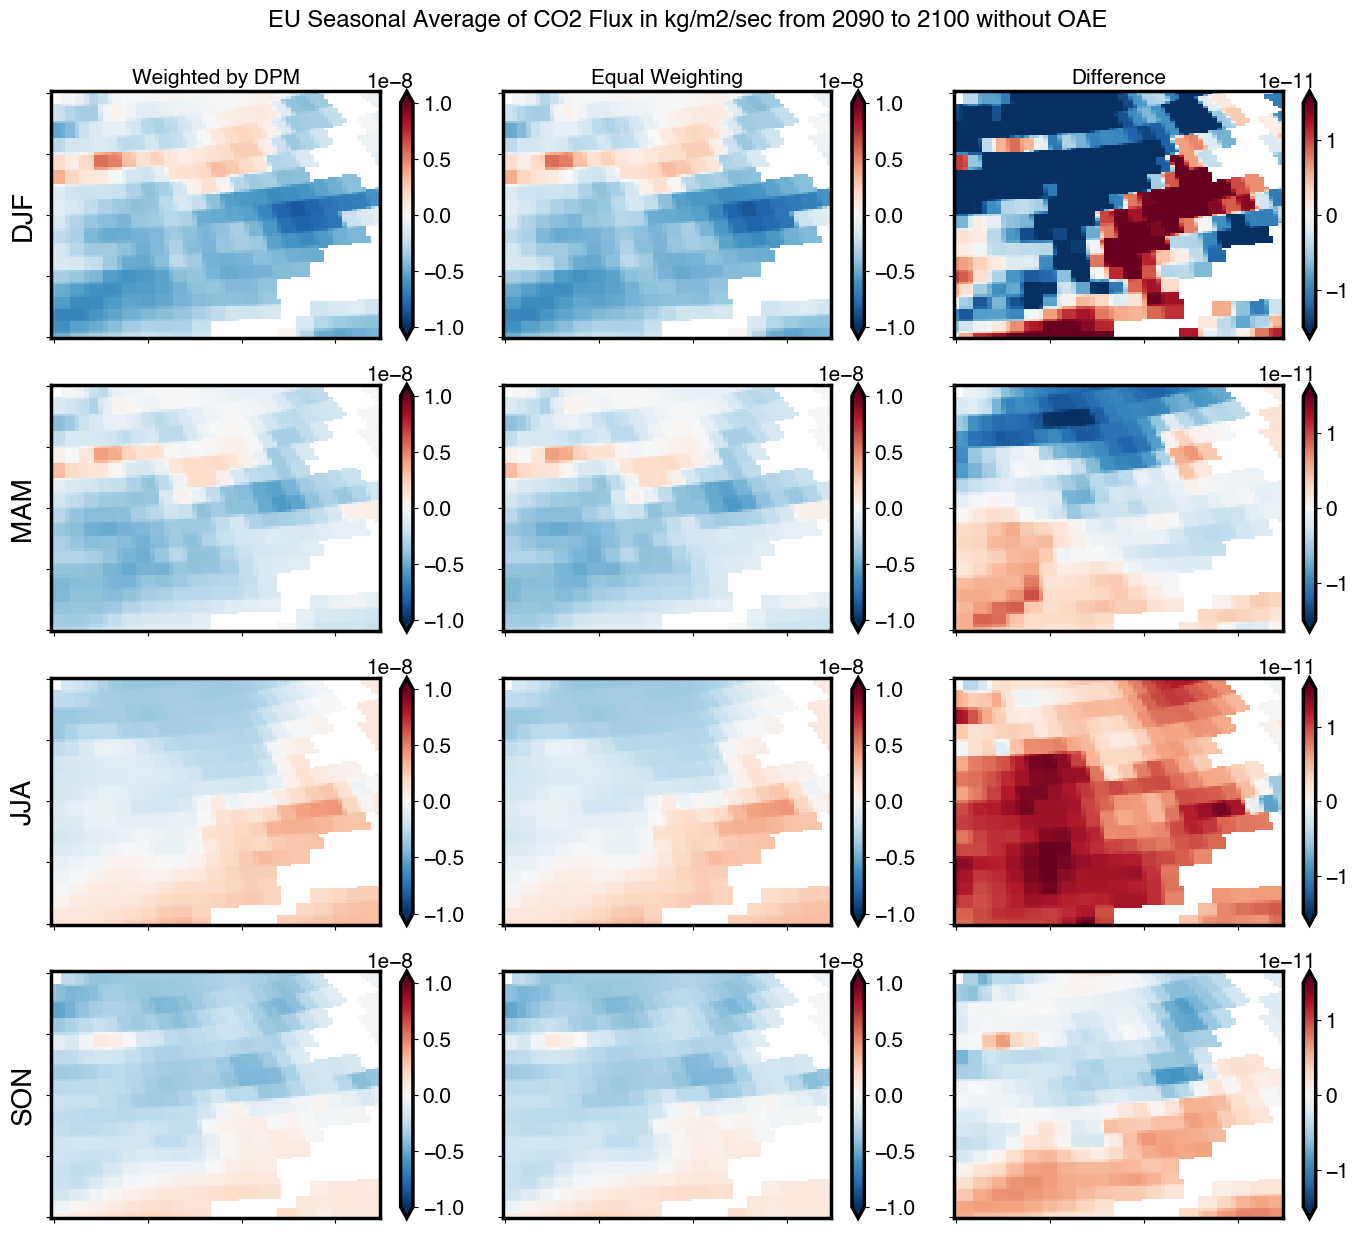

In [40]:
notnull = pd.notnull(ds_unweighted_baseline["co2flux_cpl"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_baseline["co2flux_cpl"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=-0.00000001,
        vmax=0.00000001,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_baseline["co2flux_cpl"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=-0.00000001,
        vmax=0.00000001,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_baseline["co2flux_cpl"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.000000000015,
        vmax=0.000000000015,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of CO2 Flux in kg/m2/sec from 2090 to 2100 without OAE", fontsize=17, y=1.03)

pass

### Map of EU Seasonal Average of CO2 Flux with OAE

In [41]:
month_length_oae = sliced_frame_oae.time_counter.dt.days_in_month 
weights_oae = (month_length_oae.groupby("time_counter.season") / month_length_oae.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights_oae.groupby('time_counter.season').sum().values, np.ones(4))

In [42]:
weights_oae = weights_oae.to_dataset()

In [43]:
ds_weighted_oae = (sliced_frame_oae.co2flux_cpl * weights_oae.days_in_month).groupby("time_counter.season").sum(dim="time_counter")
ds_weighted_oae = ds_weighted_oae.to_dataset(name='co2flux_cpl')
ds_unweighted_oae = sliced_frame_oae.groupby("time_counter.season").mean(dim="time_counter")
ds_diff_oae = ds_weighted_oae - ds_unweighted_oae

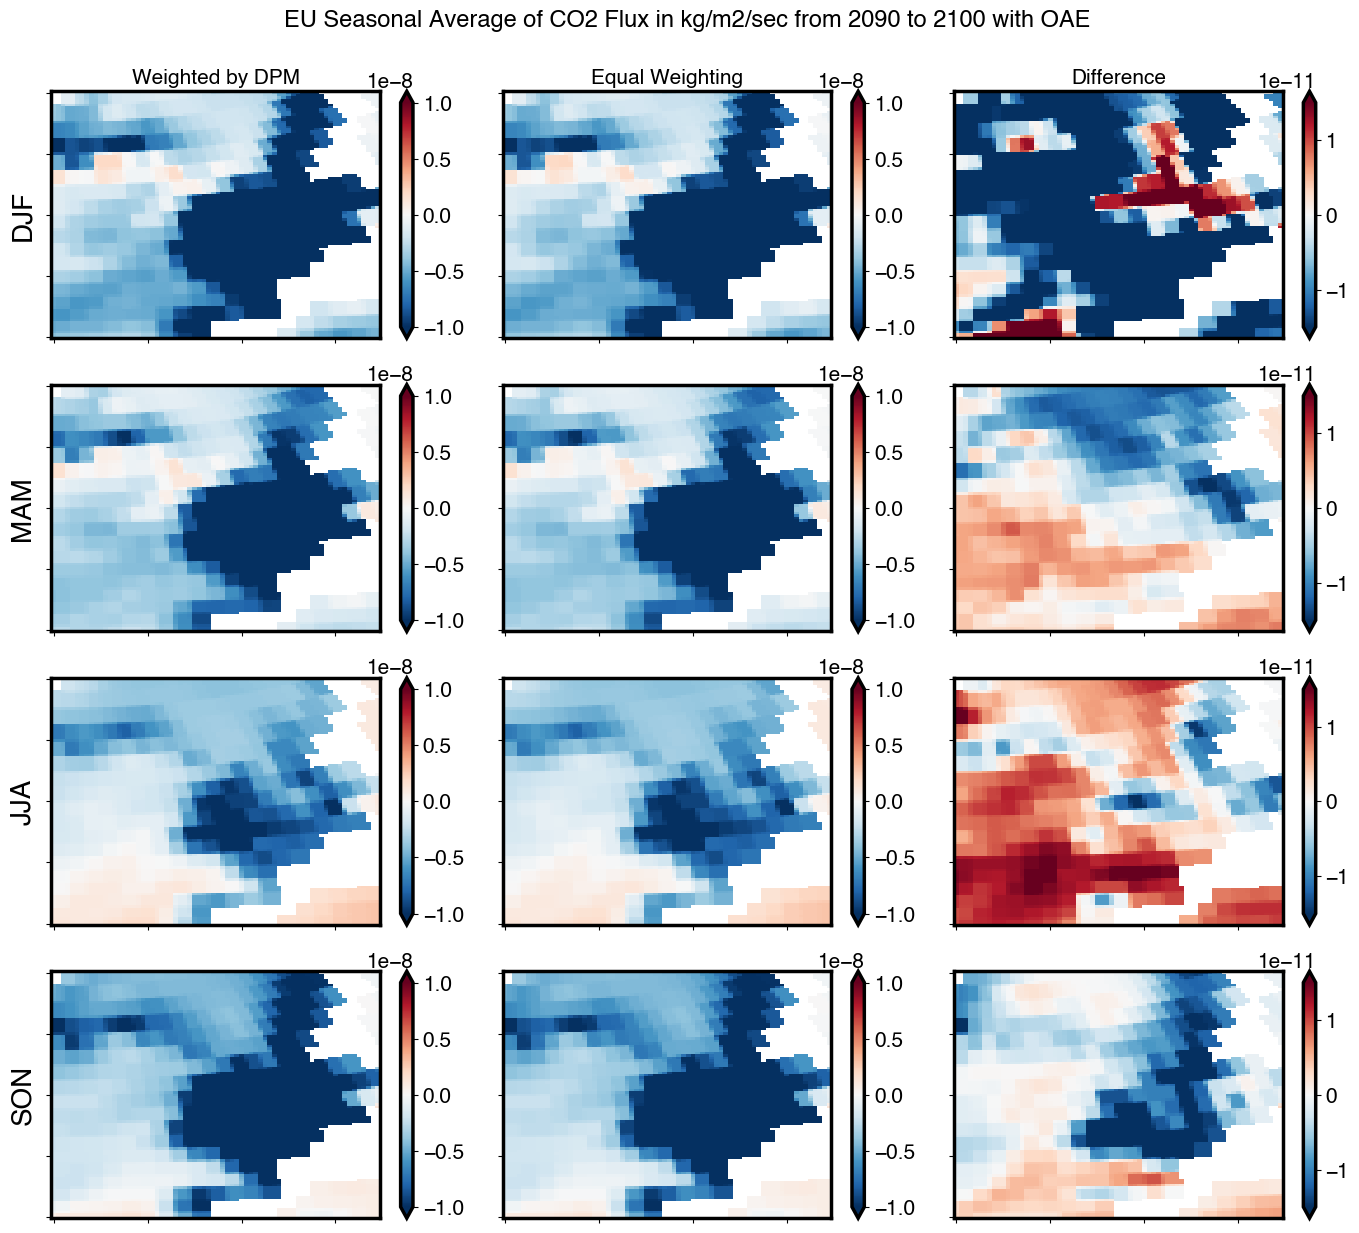

In [44]:
notnull = pd.notnull(ds_unweighted_baseline["co2flux_cpl"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_oae["co2flux_cpl"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=-0.00000001,
        vmax=0.00000001,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_oae["co2flux_cpl"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=-0.00000001,
        vmax=0.00000001,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_oae["co2flux_cpl"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.000000000015,
        vmax=0.000000000015,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of CO2 Flux in kg/m2/sec from 2090 to 2100 with OAE", fontsize=17, y=1.03)

pass

### EU Monthly Average of CO2 Flux

In [45]:
start_date_month = "2090-01-01"
end_date_month = "2100-01-01"

co2flux_baseline_month = data_baseline["co2flux_cpl"].sel(time_counter=slice(start_date_month, end_date_month))

In [46]:
co2flux_month_summary_baseline = co2flux_baseline_month.groupby('time_counter.season').mean('time_counter', skipna=True)
co2flux_month_mean_all_years_baseline = co2flux_baseline_month.resample(time_counter='M').mean(keep_attrs=True)
co2flux_monthly_mean_baseline = co2flux_month_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

In [47]:
co2flux_oae_month = data_oae["co2flux_cpl"].sel(time_counter=slice(start_date_month, end_date_month))

In [48]:
co2flux_month_summary_oae = co2flux_oae_month.groupby('time_counter.season').mean('time_counter', skipna=True)
co2flux_month_mean_all_years_oae = co2flux_oae_month.resample(time_counter='M').mean(keep_attrs=True)
co2flux_monthly_mean_oae = co2flux_month_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

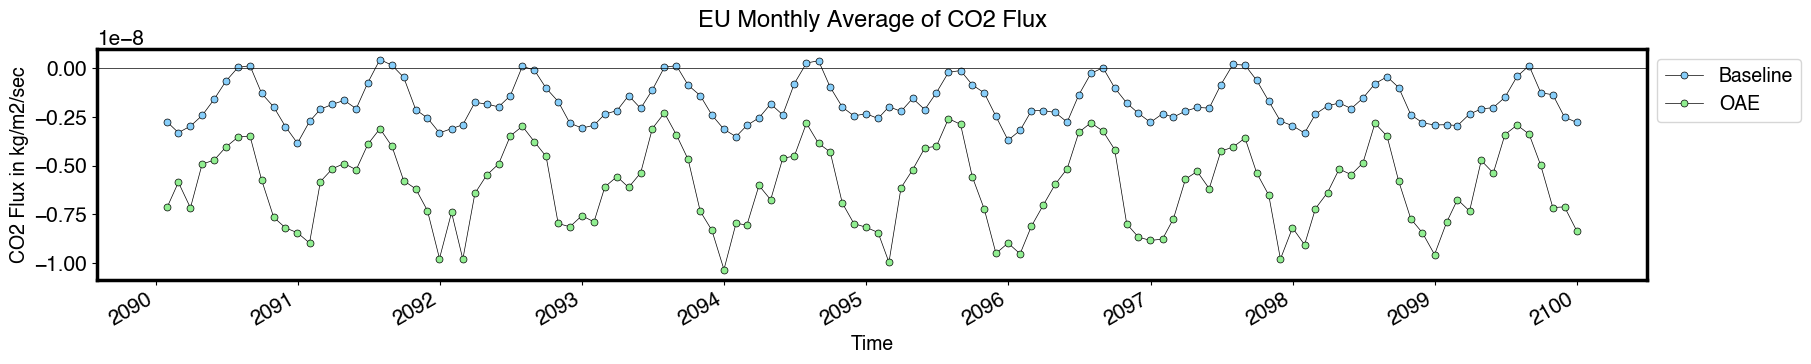

In [49]:
f, ax = plt.subplots(figsize=(20, 3))

co2flux_monthly_mean_baseline.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

co2flux_monthly_mean_oae.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("EU Monthly Average of CO2 Flux", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 Flux in kg/m2/sec", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

### EU Monthly Average of CO2 Flux without OAE (months displayed)

In [50]:
co2flux_baseline_monthly = co2flux_monthly_mean_baseline.to_dataframe('co2flux_cpl')
co2flux_baseline_monthly['Month'] = pd.DatetimeIndex(co2flux_baseline_monthly.index).month

In [51]:
conditions = [
    (co2flux_baseline_monthly['Month'] == 1),
    (co2flux_baseline_monthly['Month'] == 2),
    (co2flux_baseline_monthly['Month'] == 3),
    (co2flux_baseline_monthly['Month'] == 4),
    (co2flux_baseline_monthly['Month'] == 5),
    (co2flux_baseline_monthly['Month'] == 6),
    (co2flux_baseline_monthly['Month'] == 7),
    (co2flux_baseline_monthly['Month'] == 8),
    (co2flux_baseline_monthly['Month'] == 9),
    (co2flux_baseline_monthly['Month'] == 10),
    (co2flux_baseline_monthly['Month'] == 11),
    (co2flux_baseline_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

co2flux_baseline_monthly['Month'] = np.select(conditions, values)

In [52]:
colors = dict(zip(co2flux_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

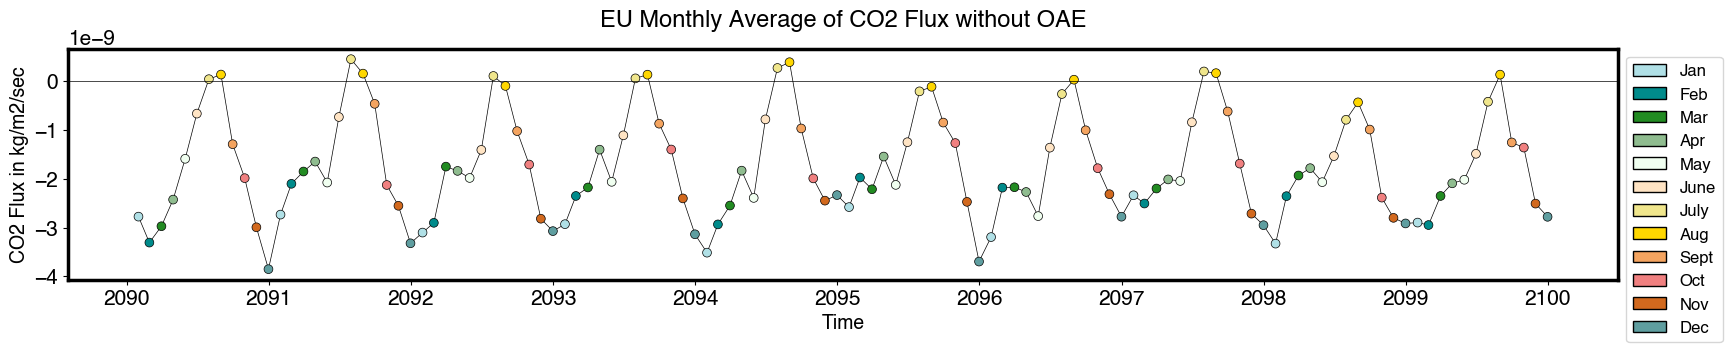

In [53]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(co2flux_baseline_monthly.index, co2flux_baseline_monthly.co2flux_cpl, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(co2flux_baseline_monthly.index, co2flux_baseline_monthly.co2flux_cpl, color=co2flux_baseline_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14)
ax.set_title("EU Monthly Average of CO2 Flux without OAE", fontname="Helvetica", fontsize=17, y=1.06)
ax.axhline(0, color='black', linewidth=0.5)

pass

### EU Monthly Average of CO2 Flux with OAE (months displayed)

In [54]:
co2flux_oae_monthly = co2flux_monthly_mean_oae.to_dataframe('co2flux_cpl')
co2flux_oae_monthly['Month'] = pd.DatetimeIndex(co2flux_oae_monthly.index).month

In [55]:
conditions = [
    (co2flux_oae_monthly['Month'] == 1),
    (co2flux_oae_monthly['Month'] == 2),
    (co2flux_oae_monthly['Month'] == 3),
    (co2flux_oae_monthly['Month'] == 4),
    (co2flux_oae_monthly['Month'] == 5),
    (co2flux_oae_monthly['Month'] == 6),
    (co2flux_oae_monthly['Month'] == 7),
    (co2flux_oae_monthly['Month'] == 8),
    (co2flux_oae_monthly['Month'] == 9),
    (co2flux_oae_monthly['Month'] == 10),
    (co2flux_oae_monthly['Month'] == 11),
    (co2flux_oae_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

co2flux_oae_monthly['Month'] = np.select(conditions, values)

In [56]:
colors = dict(zip(co2flux_oae_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

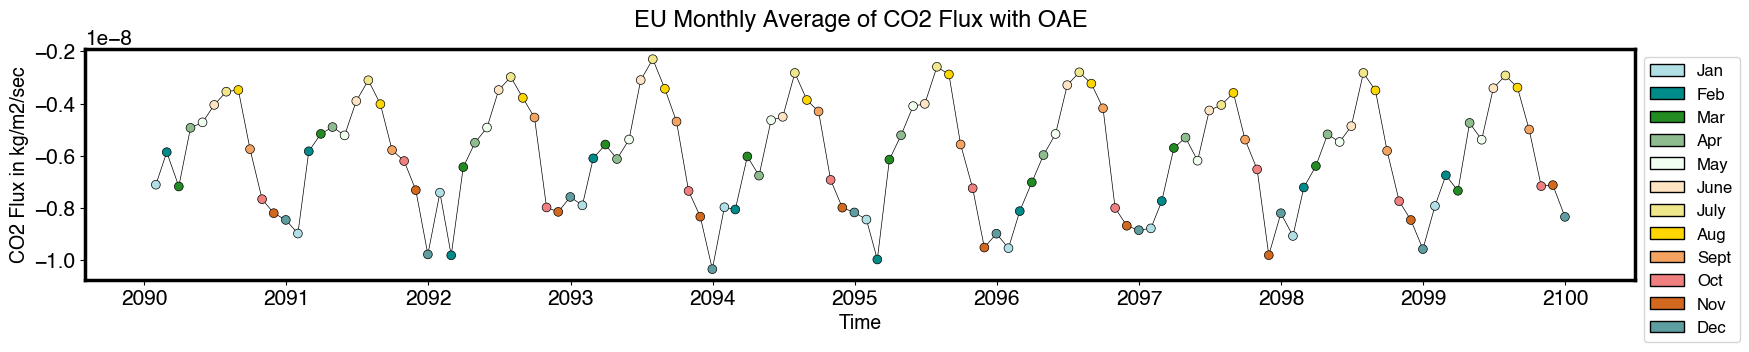

In [57]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(co2flux_oae_monthly.index, co2flux_oae_monthly.co2flux_cpl, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(co2flux_oae_monthly.index, co2flux_oae_monthly.co2flux_cpl, color=co2flux_oae_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14)
ax.set_title("EU Monthly Average of CO2 Flux with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of CO2 Flux (months displayed)

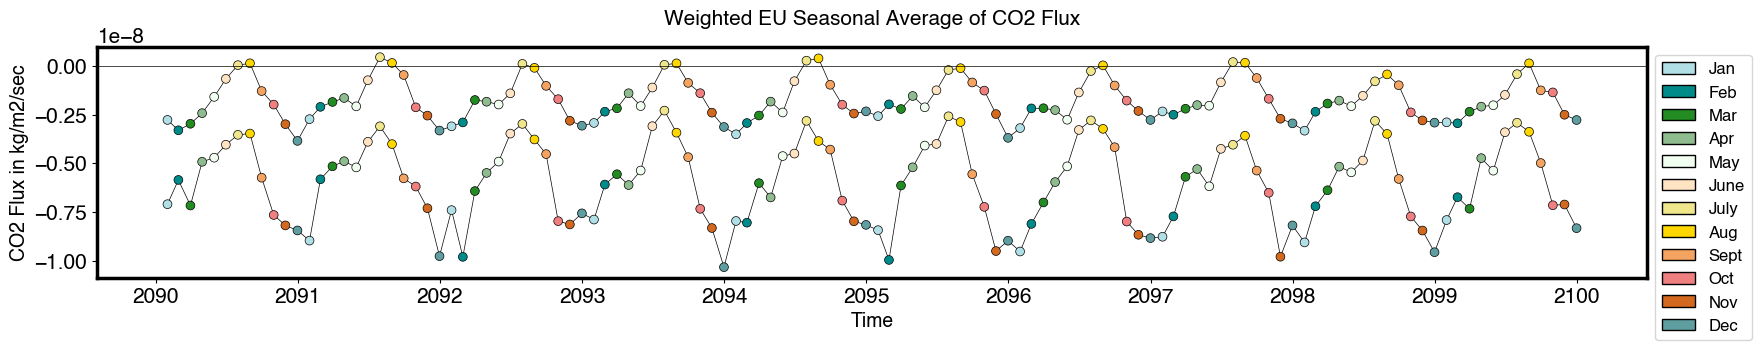

In [58]:
colors = dict(zip(co2flux_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(co2flux_baseline_monthly.index, co2flux_baseline_monthly.co2flux_cpl, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(co2flux_baseline_monthly.index, co2flux_baseline_monthly.co2flux_cpl, color=co2flux_baseline_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(co2flux_oae_monthly.index, co2flux_oae_monthly.co2flux_cpl, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(co2flux_oae_monthly.index, co2flux_oae_monthly.co2flux_cpl, color=co2flux_oae_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of CO2 Flux", fontsize=15, y=1.06)
ax.axhline(0, color='black', linewidth=0.5)

plt.savefig('co2flux_monthly_mean.png')

pass

### Δ CO2 Flux between Baseline and OAE (months displayed)

In [59]:
delta_co2flux = co2flux_baseline_monthly.co2flux_cpl - co2flux_oae_monthly.co2flux_cpl

In [60]:
delta_co2flux = delta_co2flux.to_xarray()

In [61]:
delta_co2flux = delta_co2flux.to_dataframe('co2flux_cpl')
delta_co2flux['Month'] = pd.DatetimeIndex(delta_co2flux.index).month

In [62]:
conditions = [
    (delta_co2flux['Month'] == 1),
    (delta_co2flux['Month'] == 2),
    (delta_co2flux['Month'] == 3),
    (delta_co2flux['Month'] == 4),
    (delta_co2flux['Month'] == 5),
    (delta_co2flux['Month'] == 6),
    (delta_co2flux['Month'] == 7),
    (delta_co2flux['Month'] == 8),
    (delta_co2flux['Month'] == 9),
    (delta_co2flux['Month'] == 10),
    (delta_co2flux['Month'] == 11),
    (delta_co2flux['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

delta_co2flux['Month'] = np.select(conditions, values)

In [63]:
colors = dict(zip(delta_co2flux.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

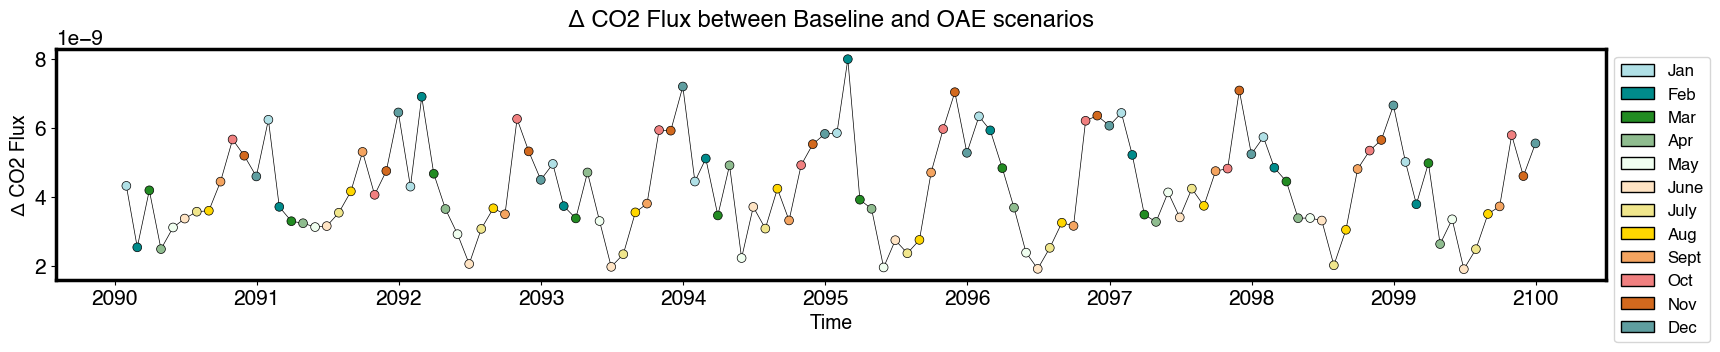

In [64]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(delta_co2flux.index, delta_co2flux.co2flux_cpl, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_co2flux.index, delta_co2flux.co2flux_cpl, color=delta_co2flux.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Δ CO2 Flux', fontsize=14)
ax.set_title("Δ CO2 Flux between Baseline and OAE scenarios", fontname="Helvetica", fontsize=17, y=1.06)

plt.savefig('co2flux_Δ.png')

pass

### CO2 Flux Annual Amplitude without OAE

In [65]:
data_baseline_minmax = data_baseline_plot.to_dataframe()
data_baseline_minmax = data_baseline_minmax.reset_index()

In [66]:
year_max_baseline = data_baseline_minmax.loc[data_baseline_minmax.groupby(data_baseline_minmax['time_counter'].dt.strftime('%Y'))['co2flux_cpl'].idxmax().values]

In [67]:
year_min_baseline = data_baseline_minmax.loc[data_baseline_minmax.groupby(data_baseline_minmax['time_counter'].dt.strftime('%Y'))['co2flux_cpl'].idxmin().values]

In [68]:
year_max_baseline['year'] = year_max_baseline['time_counter'].dt.year
year_min_baseline['year'] = year_min_baseline['time_counter'].dt.year

In [69]:
year_max_baseline = year_max_baseline.set_index('year')
year_min_baseline = year_min_baseline.set_index('year')

In [70]:
co2flux_amplitude_baseline = year_max_baseline['co2flux_cpl'] - year_min_baseline['co2flux_cpl']

In [71]:
co2flux_amplitude_baseline = co2flux_amplitude_baseline.to_xarray()

In [72]:
co2flux_amplitude_baseline = co2flux_amplitude_baseline.to_dataset()

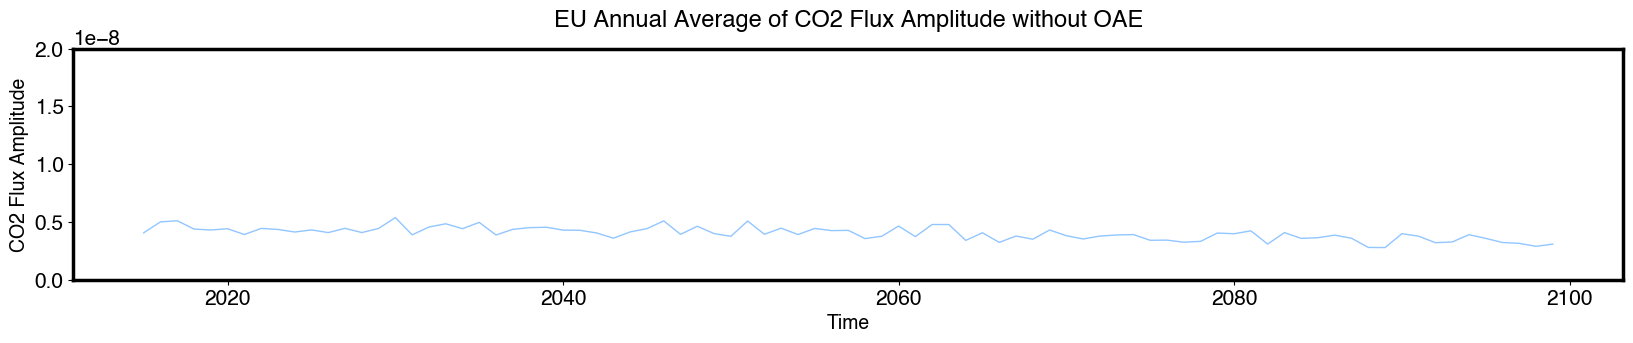

In [85]:
plt.figure(figsize=(20, 3))
plt.plot(co2flux_amplitude_baseline.year, co2flux_amplitude_baseline.co2flux_cpl, linewidth=1)
plt.ylim(0, 0.00000002)
plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 Flux Amplitude", fontsize=14)
plt.title('EU Annual Average of CO2 Flux Amplitude without OAE', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### CO2 Flux Annual Amplitude with OAE

In [74]:
data_oae_minmax = data_oae_plot.to_dataframe()
data_oae_minmax = data_oae_minmax.reset_index()

In [75]:
year_max_oae = data_oae_minmax.loc[data_oae_minmax.groupby(data_oae_minmax['time_counter'].dt.strftime('%Y'))['co2flux_cpl'].idxmax().values]

In [76]:
year_min_oae = data_oae_minmax.loc[data_oae_minmax.groupby(data_oae_minmax['time_counter'].dt.strftime('%Y'))['co2flux_cpl'].idxmin().values]

In [77]:
year_max_oae['year'] = year_max_oae['time_counter'].dt.year
year_min_oae['year'] = year_min_oae['time_counter'].dt.year

In [78]:
year_max_oae = year_max_oae.set_index('year')
year_min_oae = year_min_oae.set_index('year')

In [79]:
co2flux_amplitude_oae = year_max_oae['co2flux_cpl'] - year_min_oae['co2flux_cpl']

In [80]:
co2flux_amplitude_oae = co2flux_amplitude_oae.to_xarray()

In [81]:
co2flux_amplitude_oae = co2flux_amplitude_oae.to_dataset()

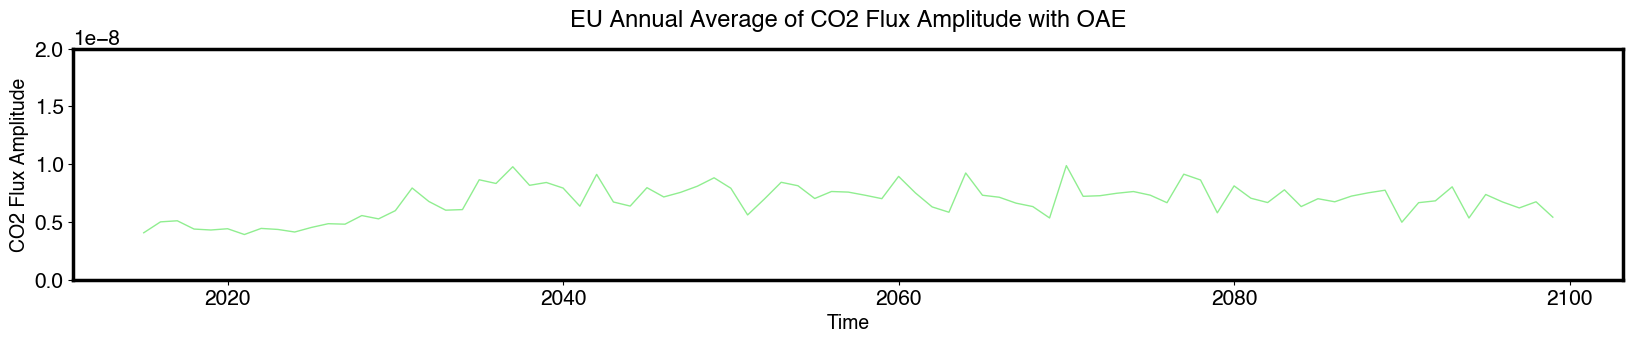

In [84]:
plt.figure(figsize=(20, 3))
plt.plot(co2flux_amplitude_oae.year, co2flux_amplitude_oae.co2flux_cpl, linewidth=1, color='lightgreen')
plt.ylim(0, 0.00000002)
plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 Flux Amplitude", fontsize=14)
plt.title('EU Annual Average of CO2 Flux Amplitude with OAE', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### CO2 Flux Annual Amplitude with and without OAE

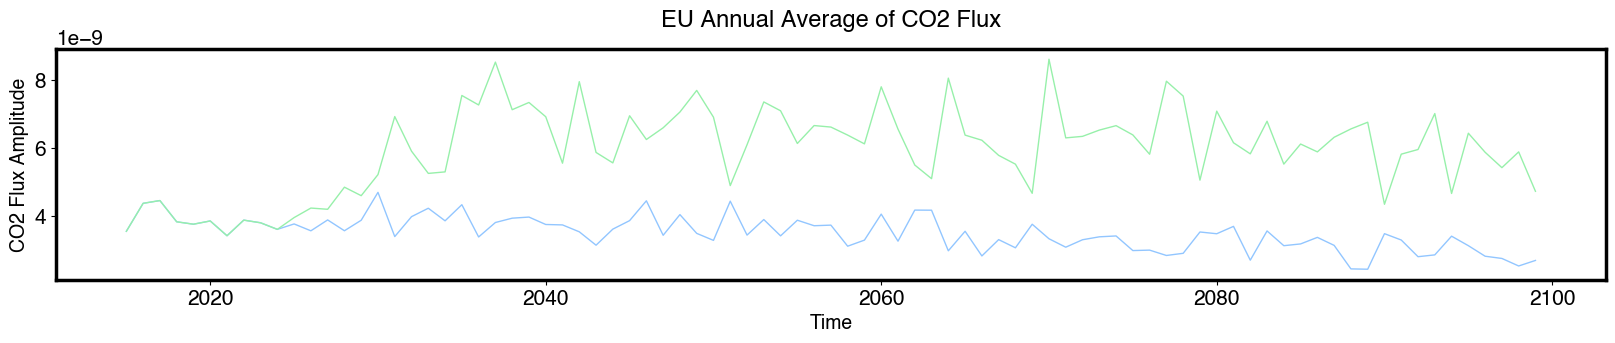

In [139]:
plt.figure(figsize=(20, 3))
plt.plot(co2flux_amplitude_baseline.year, co2flux_amplitude_baseline.co2flux_cpl, linewidth=1, label = 'Baseline')
plt.plot(co2flux_amplitude_oae.year, co2flux_amplitude_oae.co2flux_cpl, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 Flux Amplitude", fontsize=14)
plt.title('EU Annual Average of CO2 Flux', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### % Amplitude Change Over Time with and without OAE

In [140]:
co2flux_amplitude_baseline_pct = co2flux_amplitude_baseline.to_dataframe()
co2flux_amplitude_oae_pct = co2flux_amplitude_oae.to_dataframe()

In [141]:
co2flux_amplitude_baseline_pct = co2flux_amplitude_baseline_pct.pct_change()
co2flux_amplitude_oae_pct = co2flux_amplitude_oae_pct.pct_change()

In [142]:
co2flux_amplitude_baseline_pct = co2flux_amplitude_baseline_pct.to_xarray()
co2flux_amplitude_oae_pct = co2flux_amplitude_oae_pct.to_xarray()

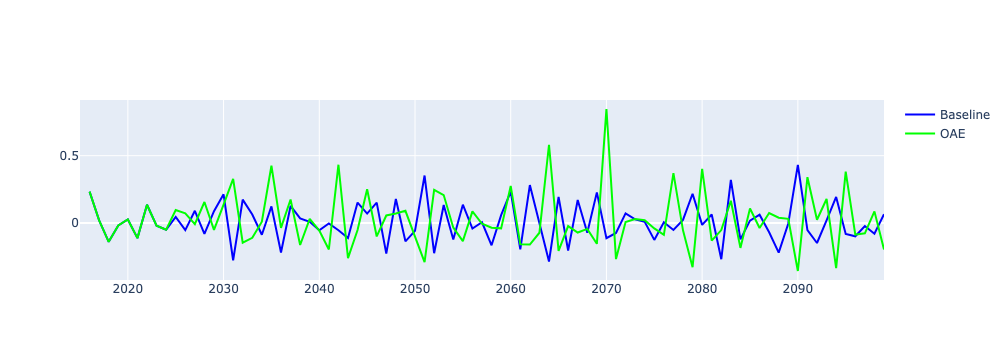

In [131]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=co2flux_amplitude_baseline_pct.year, y=co2flux_amplitude_baseline_pct['co2flux_cpl'],
                    mode='lines', line_color='#0000FF',
                    name='Baseline'))
fig.add_trace(go.Scatter(x=co2flux_amplitude_oae_pct.year, y=co2flux_amplitude_oae_pct['co2flux_cpl'],
                    mode='lines', line_color='#00FF00',
                    name='OAE'))
fig.show()